# KMeans Algo


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv(r'C:\Users\Pranav\Desktop\face recogn\Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
X = df.drop(columns=['CustomerID', 'Gender', 'Age'], axis=1).values

In [19]:
plt.figure(figsize=(15,8))


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

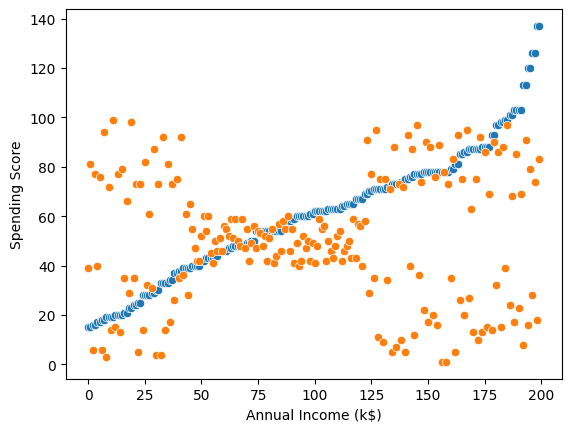

In [29]:
sns.scatterplot(X[:,0])
sns.scatterplot(X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

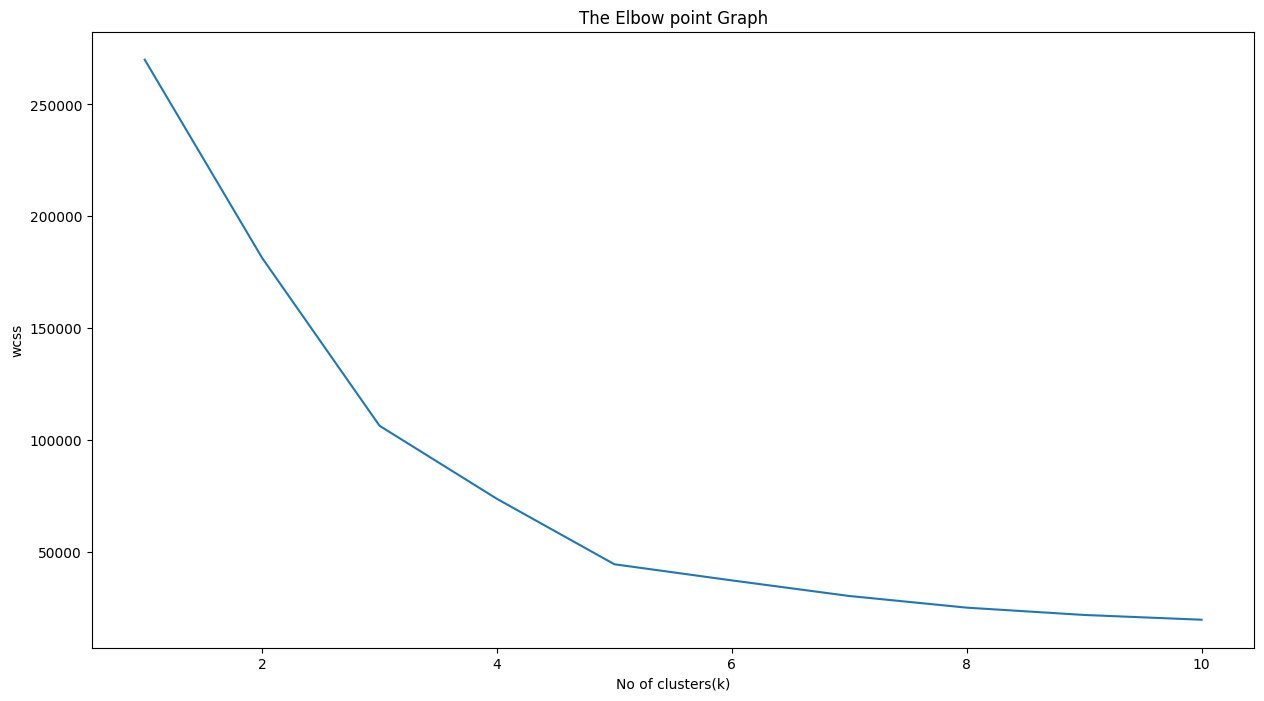

In [30]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow point Graph')
plt.xlabel('No of clusters(k)')
plt.ylabel('wcss')
plt.show()
    

In [31]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

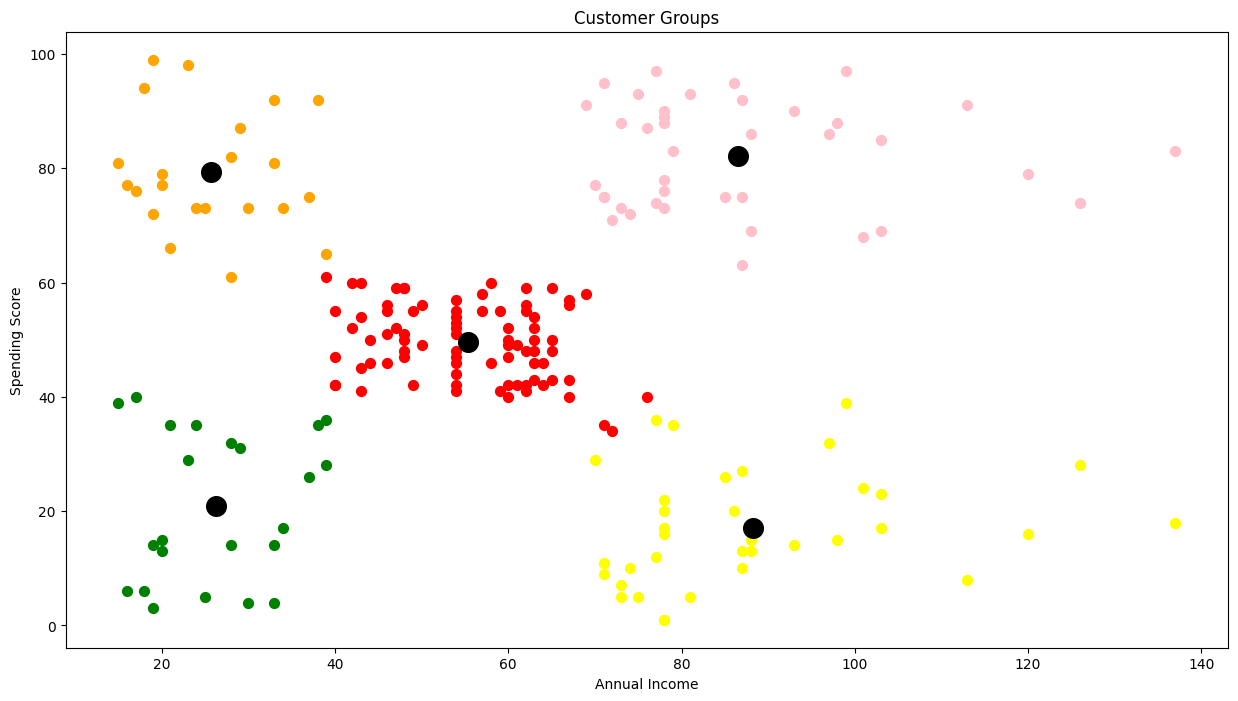

In [39]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200, c='black', label= 'centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()